# Data Exploration

In [292]:
import json
import os
import pandas as pd
from pandas.io.json import json_normalize
import nltk
import re
import numpy as np
from wordcloud import WordCloud
import spacy

import matplotlib.pyplot as plt
%matplotlib inline

## Utils

In [330]:
# util methods
def load_json(json_path, artists=[]):
    if (os.path.isfile(json_path)):
        print("json")
        with open(json_path) as f:
            song_data = json.load(f)
            return song_data['songs']
        
    elif (os.path.isdir(json_path)):
        data = []
        json_files = []
        if (len(artists) > 0):
            for artist in artists:
                json_files = json_files + [json_file for json_file in os.listdir(json_path) if ((json_file.endswith('.json')) & (artist in json_file))]
        else:
            json_files = [json_file for json_file in os.listdir(json_path) if json_file.endswith('.json')]

        for json_file in json_files:
            path_to_json = os.path.join(json_path, json_file)
            with open(path_to_json) as f:
                song_data = json.load(f)
                data = data + song_data['songs']
        
        return data
    
    
def normalize_lyric(text, lower=True):
    if lower:
        text = text.lower()
    text = re.sub('\[.+\](\\n)|\[.+\](\(.*\))', '', text)
    return text 


def calc_stats(lyrics_array):
    lyrics_array = [normalize_lyric(lyric) for lyric in lyrics_array]
    lyrics = ''.join(lyrics_array)
    lyrics = normalize_lyric(lyrics)
    words = re.findall('\'?\w+-?\'?\w+? ', lyrics)
    words = [word.strip() for word in words]
    unique_words = list(set(words))
    
    char_lens = []
    word_lens = []
    for line in lyrics.splitlines():
        if line != '':
            char_len = len(line)
            word_len = len(line.split(' '))

            char_lens.append(char_len)
            word_lens.append(word_len)
            
    lyrics_char_lens = []
    lyrics_word_lens = []
    for lyr in lyrics_array:
        lyrics_char_lens.append(len(lyr))
        lyrics_word_lens.append(len(lyr.split(' ')))
    
    char_lens = np.array(char_lens)
    word_lens = np.array(word_lens)
    lyrics_char_lens = np.array(lyrics_char_lens)
    lyrics_word_lens = np.array(lyrics_word_lens)
    
    print('Corpus Stats:')    
    print('Number of lyrics: \t{}'.format(len(lyrics_array)))
    print('Number of words: \t{}'.format(len(words)))
    print('Number of u_words: \t{}'.format(len(unique_words)))
    print('\n')
    print('Character Stats:')
    print('Number of avg char length in line: \t{}'.format(np.mean(char_lens)))
    print('Number of min char length in line: \t{}'.format(np.min(char_lens)))
    print('Number of max char length in line: \t{}'.format(np.max(char_lens)))
    print('\n')
    print('Word Stats:')
    print('Number of avg word length in line: \t{}'.format(np.mean(word_lens)))
    print('Number of min word length in line: \t{}'.format(np.min(word_lens)))
    print('Number of max word length in line: \t{}'.format(np.max(word_lens)))   
    print('\n')
    print('---------------------')
    print('Lyrics Stats:') 
    print('Character Stats Lyrics:')
    print('Number of avg char length in one lyric: \t{}'.format(np.mean(lyrics_char_lens)))
    print('Number of min char length in one lyric: \t{}'.format(np.min(lyrics_char_lens)))
    print('Number of max char length in one lyric: \t{}'.format(np.max(lyrics_char_lens)))
    print('\n')
    print('Word Stats Lyrics:')
    print('Number of avg words length in one lyric: \t{}'.format(np.mean(lyrics_word_lens)))
    print('Number of min words length in one lyric: \t{}'.format(np.min(lyrics_word_lens)))
    print('Number of max words length in one lyric: \t{}'.format(np.max(lyrics_word_lens)))
    
    
def get_ger_stopwords():
    stop_words = nltk.corpus.stopwords.words('german')
    stop_words.append("'ne")
    stop_words.append("dass") 
    
    return stop_words


def plot_word_freq(lyrics, num=60, use_stop_word=True):
    lyrics = lyrics.replace('\n', ' ')
    words = re.findall('\'?\w+-?\'?\w+? ', lyrics)
    words = [word.strip() for word in words]
    
    if use_stop_word:
        stop_words = get_ger_stopwords()
        words_filtered = []
        for word in words:
            if word not in stop_words:
                words_filtered.append(word)
        words = words_filtered
        
    plt.figure(figsize=(12,5))
    fd = nltk.FreqDist(words)
    fd.plot(num)    

    
def plot_word_cloud(text):
    stop_words = get_ger_stopwords()
    text = text.replace('\n', ' ')
    words = re.findall('\'?\w+-?\'?\w+? ', text)
    words = [word.strip() for word in words]
    words_filtered = []
    for word in words:
        if word not in stop_words:
            words_filtered.append(word)
            
    text = ' '.join(words_filtered)
    wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    

def get_nouns_verbs_adjs(text):
    # python -m spacy download de_core_news_sm
    nlp = spacy.load('de_core_news_sm')
    doc = nlp(text)
    
    nouns = []
    verbs = []
    adjs = []
    for token in doc:
        #print(token.text, token.pos_)
        if token.pos_ == 'NOUN':
            nouns.append(token.text)
        
        if token.pos_ == 'VERB':
            verbs.append(token.text)
            
        if token.pos_ == 'ADJ':
            adjs.append(token.text)
            
    return nouns, verbs, adjs

In [331]:
json_path = '../data/deutsch'
artists = ['Bushido']

data = load_json(json_path, artists)
df = json_normalize(data)

Lyrics = normalize_lyric(''.join(df.lyrics.values), lower=False)
lyrics = normalize_lyric(''.join(df.lyrics.values))

In [332]:
nouns, verbs, adjs = get_nouns_verbs_adjs(Lyrics)

In [333]:
calc_stats(df.lyrics.values)

Corpus Stats:
Number of lyrics: 	100
Number of words: 	39700
Number of u_words: 	4487


Character Stats:
Number of avg char length in line: 	46.75824352581631
Number of min char length in line: 	2
Number of max char length in line: 	720


Word Stats:
Number of avg word length in line: 	8.283577288081068
Number of min word length in line: 	1
Number of max word length in line: 	126


---------------------
Lyrics Stats:
Character Stats Lyrics:
Number of avg char length in one lyric: 	2973.89
Number of min char length in one lyric: 	798
Number of max char length in one lyric: 	10859


Word Stats Lyrics:
Number of avg words length in one lyric: 	453.82
Number of min words length in one lyric: 	126
Number of max words length in one lyric: 	1655


All Words:


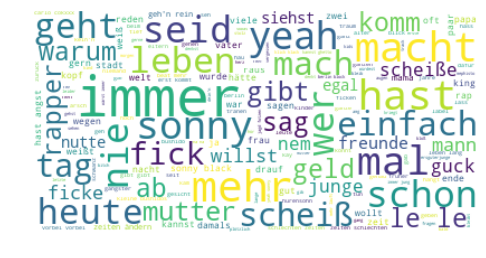

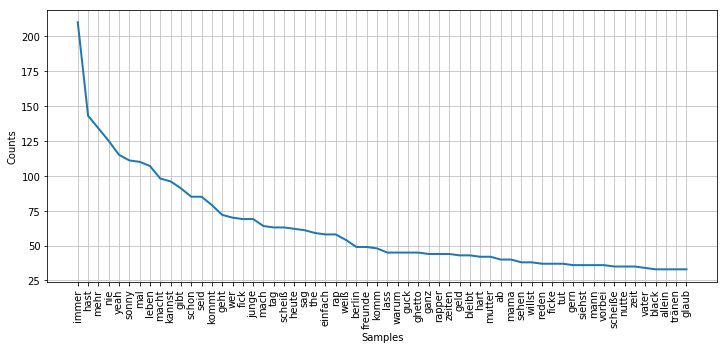

In [309]:
print('All Words:')
plot_word_cloud(lyrics)
plot_word_freq(lyrics)

Word Cloud Nouns


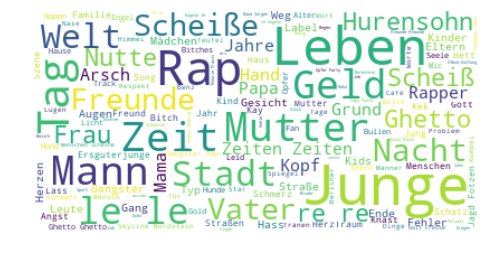

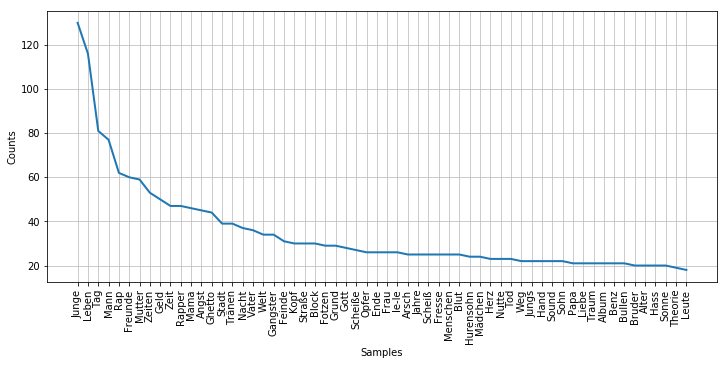

In [310]:
print('Word Cloud Nouns')
plot_word_cloud(' '.join(nouns))
plot_word_freq(' '.join(nouns))

Word Cloud Verbs


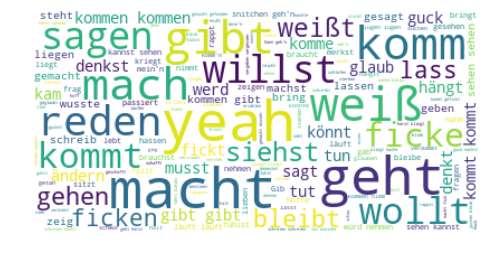

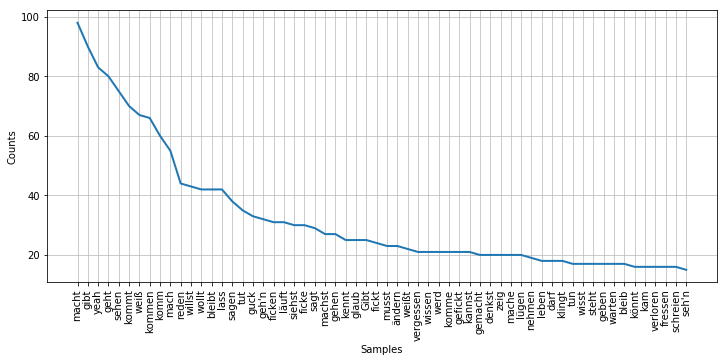

In [311]:
print('Word Cloud Verbs')
plot_word_cloud(' '.join(verbs))
plot_word_freq(' '.join(verbs))

Word Cloud Adjectives


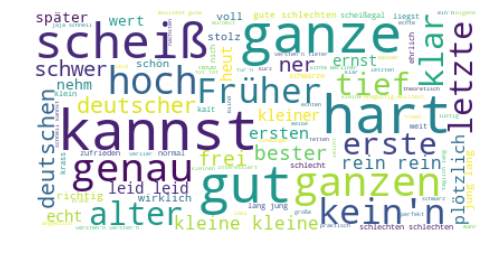

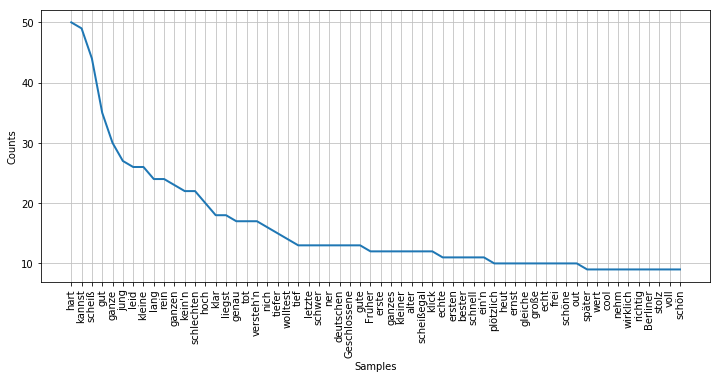

In [312]:
print('Word Cloud Adjectives')
plot_word_cloud(' '.join(adjs))
plot_word_freq(' '.join(adjs))

In [313]:
# english stuff

1980es Rap


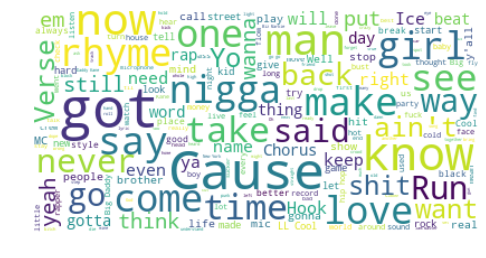

In [162]:
artists_80es = [
    'Run-D.M.C.',
    'Beastie Boys',
    'LL Cool J',
    'Big Daddy Kane',
    'Ice T',
    'Rakim',
    'Biz Markie'
]
print('1980es Rap')
data = load_json('../data/', artists_80es)
df = json_normalize(data)
lyrics = " ".join(df.lyrics.values)
plot_word_cloud(clean_text(lyrics))

1990s Rap


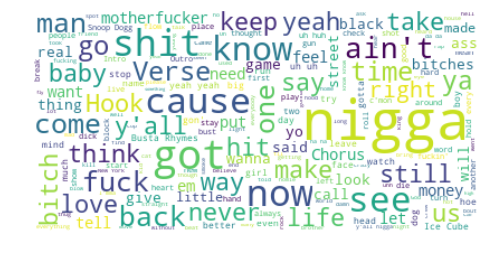

In [163]:
artists_90es = [
    '2Pac',
    'The Notorious B.I.G.',
    'Busta Rhymes',
    'Snoop Dogg',
    'DMX',
    'Outkast',
    'Puff Daddy',
    'Ice Cube',
    'Jay Z',
    'Nas'
]
print("1990s Rap")
data = load_json('../data/', artists_90es)
df = json_normalize(data)
lyrics = " ".join(df.lyrics.values)
plot_word_cloud(clean_text(lyrics))

2000s Rap


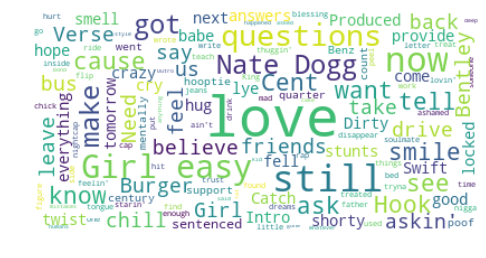

In [164]:
artists_00s = [
    '50 Cent',
    'Nelly',
    'Lil Wayne',
    'Missy Elliot',
    'T.I.',
    'Eminem',
    'Ludacris',
    'Xzibit',
    'The Game',
    'Kanye West'
]
print("2000s Rap")
data = load_json('../data/', artists_00s)
df = json_normalize(data)
lyrics = " ".join(df.lyrics.values)
plot_word_cloud(clean_text(df.lyrics.values[0]))

In [35]:
df.artist.unique()

array(['2Pac'], dtype=object)

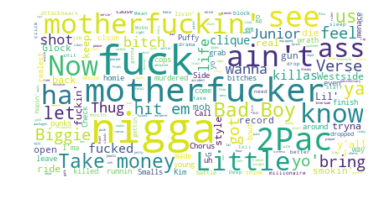

In [36]:
plot_word_cloud(clean_text(df.lyrics.values[0]))

In [13]:
def clean_text(text):
    return text.replace('\n', ' ')

In [14]:
def load_lyrics(target):
    lyrics = ''
    if(os.path.isfile(target)):
        with open(target) as f:
            data = json.load(f)
            for song in data['songs']:
                lyrics = lyrics + ' ' + song['lyrics']    

In [15]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [106]:
def load_json(json_path, artists=[]):
    if (os.path.isfile(json_path)):
        print("json")
        with open(json_path) as f:
            song_data = json.load(f)
            return song_data['songs']
        
    elif (os.path.isdir(json_path)):
        data = []
        json_files = []
        if (len(artists) > 0):
            for artist in artists:
                json_files = json_files + [json_file for json_file in os.listdir(json_path) if ((json_file.endswith('.json')) & (artist in json_file))]
        else:
            json_files = [json_file for json_file in os.listdir(json_path) if json_file.endswith('.json')]

        for json_file in json_files:
            path_to_json = os.path.join(json_path, json_file)
            with open(path_to_json) as f:
                song_data = json.load(f)
                data = data + song_data['songs']
        
        return data

In [111]:
datas = load_json("../data/test", artists=["50 Cent", "2Pac"])

In [112]:
json_normalize(datas)

,album,artist,image,lyrics,raw.album,raw.album.api_path,raw.album.artist.api_path,raw.album.artist.header_image_url,raw.album.artist.id,raw.album.artist.image_url,...,raw.stats.verified_annotations,raw.title,raw.title_with_featured,raw.url,raw.verified_annotations_by,raw.verified_contributors,raw.verified_lyrics_by,raw.writer_artists,title,year
0,Get Rich or Die Tryin’,50 Cent,https://images.genius.com/1a10bcefe2e4c82bd02b...,[Produced by Dirty Swift]\n\n[Intro: 50 Cent]\...,NaN,/albums/141,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,0,21 Questions,21 Questions (Ft. Nate Dogg),https://genius.com/50-cent-21-questions-lyrics,[],[],[],"[{'api_path': '/artists/411837', 'header_image...",21 Questions,2003-04-29
1,Get Rich or Die Tryin’,50 Cent,https://images.genius.com/3389143a3e12456fc07d...,[Produced by Dr. Dre & Mike Elizondo]\n\n[Intr...,NaN,/albums/141,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,1,In Da Club,In Da Club,https://genius.com/50-cent-in-da-club-lyrics,"[{'api_path': '/users/1628085', 'avatar': {'ti...","[{'contributions': ['annotations'], 'artist': ...",[],"[{'api_path': '/artists/108', 'header_image_ur...",In Da Club,2003-01-07
2,Get Rich or Die Tryin’,50 Cent,https://images.genius.com/17bdb55979efe915f90e...,"[Produced by Darrell ""Digga"" Branch, Eminem & ...",NaN,/albums/141,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,0,Many Men (Wish Death),Many Men (Wish Death),https://genius.com/50-cent-many-men-wish-death...,[],[],[],"[{'api_path': '/artists/33782', 'header_image_...",Many Men (Wish Death),2003-05-06
3,Street King Immortal,50 Cent,https://images.genius.com/4dbad662e44b87d87010...,[Produced by S1]\n\n[Hook: Adam Levine]\nMy li...,NaN,/albums/129063,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,0,My Life,My Life (Ft. Adam Levine & Eminem),https://genius.com/50-cent-my-life-lyrics,[],[],[],"[{'api_path': '/artists/27446', 'header_image_...",My Life,2012-11-26
4,Get Rich or Die Tryin’,50 Cent,https://images.genius.com/17bdb55979efe915f90e...,"[Intro: 50 Cent]\nHey Em, you know you're my f...",NaN,/albums/141,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,0,Patiently Waiting,Patiently Waiting (Ft. Eminem),https://genius.com/50-cent-patiently-waiting-l...,[],[],[],"[{'api_path': '/artists/34793', 'header_image_...",Patiently Waiting,2003-02-06
5,Get Rich or Die Tryin’,50 Cent,https://images.genius.com/2a2618322acb97f3f553...,[Produced by Mr. Porter]\n\n[Hook]\nI don't kn...,NaN,/albums/141,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,0,P.I.M.P.,P.I.M.P.,https://genius.com/50-cent-pimp-lyrics,[],[],[],"[{'api_path': '/artists/509', 'header_image_ur...",P.I.M.P.,2003-08-12
6,Back To The Street 2,50 Cent,https://images.genius.com/75c39cc8eae85507e7a0...,"[Intro: 50 Cent]\nYeah, uh-huh\nThey don't do ...",NaN,/albums/124665,/artists/2035,https://images.genius.com/26db07f1ab289c5c8f33...,2035.0,https://images.genius.com/26db07f1ab289c5c8f33...,...,1,We Up,We Up (Ft. Kendrick Lamar & Kidd Kidd),https://genius.com/50-cent-we-up-lyrics,"[{'api_path': '/users/131117', 'avatar': {'tin...","[{'contributions': ['annotations'], 'artist': ...",[],"[{'api_path': '/artists/13585', 'header_image_...",We Up,2013-01-01
7,The Kanan Tape,50 Cent,https://images.genius.com/ba09eef1371d0972cfb1...,[Produced by Sonny Digital]\n\n[Verse 1: 50 Ce...,NaN,/albums/137591,/artists/108,https://images.genius.com/fa1efdac6b49f657ea25...,108.0,https://images.genius.com/3ac0369e9af7e95b4d15...,...,0,I'm the Man,I'm the Man (Ft. Sonny Digital),https://genius.com/50-cent-im-the-man-lyrics,[]

In [91]:
datas[datas.artist == "50 Cent"]

AttributeError: 'list' object has no attribute 'artist'

In [5]:
with open('../data/2Pac_lyrics.json') as f:
    data = json.load(f)

In [10]:
for i in data:
    print(i

songs
artist


In [20]:
data["songs"][0]["lyrics"]

"[Intro: 2Pac]\nI ain't got no motherfuckin' friends\nThat's why I fucked yo' bitch, you fat motherfucker!\n(Take money) West Side, Bad Boy killas\n(Take money) You know who the realest is\n(Take money) We bring it too\n(Take money)\n\n[Verse 1: 2Pac]\nFirst off, fuck yo' bitch and the clique you claim\nWestside when we ride, come equipped with game\nYou claim to be a player, but I fucked your wife\nWe bust on Bad Boys, niggas fucked for life\nPlus, Puffy tryna see me, weak hearts I rip\nBiggie Smalls and Junior M.A.F.I.A. is some mark-ass bitches\nWe keep on comin' while we runnin' for your jewels\nSteady gunnin', keep on bustin' at them fools, you know the rules\nLil' Caesar, go ask your homie how I'll leave ya\nCut your young-ass up, leave you in pieces, now be deceased\nLil' Kim, don't fuck around with real G's\nQuick to snatch yo' ugly ass off the streets, so fuck peace!\nI'll let them niggas know it's on for life\nDon't let the Westside ride tonight (ha ha ha)\nBad Boy murdered o

In [22]:
len(data["songs"])

100

In [23]:
T = "ABC"

In [24]:
T + T

'ABCABC'

In [94]:
"abc".contains(["a"])

AttributeError: 'str' object has no attribute 'contains'

In [97]:
["a"] in "abx"

TypeError: 'in <string>' requires string as left operand, not list

In [319]:
test = [normalize_lyric(lyric) for lyric in df.lyrics.values]


In [324]:
lyrics_char_lens = []
lyrics_word_lens = []
for t in test:
    lyrics_char_lens.append(len(t))
    lyrics_word_lens.append(len(t.split(' ')))

In [325]:
lyrics_word_lens

[1655,
 583,
 547,
 503,
 470,
 486,
 590,
 607,
 524,
 353,
 530,
 453,
 407,
 1551,
 474,
 267,
 535,
 377,
 388,
 345,
 372,
 344,
 209,
 519,
 281,
 277,
 307,
 573,
 338,
 294,
 557,
 273,
 440,
 491,
 531,
 395,
 286,
 303,
 309,
 344,
 531,
 541,
 283,
 651,
 388,
 642,
 369,
 513,
 406,
 583,
 313,
 293,
 379,
 446,
 272,
 415,
 580,
 908,
 476,
 386,
 345,
 348,
 431,
 428,
 385,
 554,
 306,
 364,
 408,
 320,
 279,
 390,
 398,
 675,
 584,
 596,
 428,
 499,
 542,
 353,
 126,
 607,
 346,
 396,
 396,
 630,
 345,
 293,
 696,
 295,
 376,
 491,
 294,
 547,
 486,
 332,
 312,
 346,
 351,
 621]